This small project will explore and analyze the IMDb Top 250 movies using <code>matplotlib/seaborn</code> and <code>pandas</code>.
The "IMDb Top 250 Movies Dataset: Ultimate Movie Ranking Collection" is an extensive and meticulously curated dataset, available on Kaggle, that offers a comprehensive compilation of the top 250 movies as ranked by IMDb. This dataset serves as an invaluable resource for movie enthusiasts, researchers, and data scientists seeking to explore and analyze the world of cinema.

In [156]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

sns.set_style("darkgrid")
#Open the dataframe using pandas
movies = pd.read_csv("IMDb_Top_250_Movies.csv", encoding="windows-1254")


In [157]:
movies.set_index("Sl_No",inplace=True) #Use the default index as index
movies.head(n=10)

,Name,Release_Year,Duration,Certificate,Rating,Votes,Director,Stars,Description
Sl_No,,,,,,,,,
1,The Shawshank,1994,142,15,9.3,2765122,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton","Over the course of several years, two convicts..."
2,The Godfather,1972,175,X,9.2,1924399,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan","Don Vito Corleone, head of a mafia family, dec..."
3,The Dark Knight,2008,152,12A,9.0,2738387,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",When the menace known as the Joker wreaks havo...
4,The Godfather Part II,1974,202,X,9.0,1309392,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall",The early life and career of Vito Corleone in ...
5,12 Angry Men,1957,96,U,9.0,819728,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam",The jury in a New York City murder trial is fr...
6,Schindler's List,1993,195,15,9.0,1392843,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley","In German-occupied Poland during World War II,..."
7,The Lord of the Rings: The Return of the King,2003,201,12A,9.0,1897710,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen",Gandalf and Aragorn lead the World of Men agai...
8,Pulp Fiction,1994,154,18,8.9,2122795,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson","The lives of two mob hitmen, a boxer, a gangst..."
9,The Lord of the Rings: The Fellowship of the Ring,2001,178,PG,8.8,1926139,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom",A meek Hobbit from the Shire and eight compani...


With a wide array of attributes, the dataset provides detailed information for each movie entry. The columns include:

- Sl_No: A unique serial number assigned to each movie in the dataset.
- Name: The title of the movie.
- Release_Year: The year when the movie was released.
- Duration: The duration of the movie in minutes.
- Certificate: The certification or rating assigned to the movie.
- Rating: The IMDb rating of the movie, reflecting its overall user-generated score.
- Votes: The number of votes received by the movie on IMDb.
- Director: The name of the director(s) of the movie.
- Stars: The main actors or actresses who starred in the movie.
- Description: A brief summary or description of the movie.

In [158]:
#The data are already formatted in the correct type
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 1 to 250
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          250 non-null    object 
 1   Release_Year  250 non-null    int64  
 2   Duration      250 non-null    int64  
 3   Certificate   249 non-null    object 
 4   Rating        250 non-null    float64
 5   Votes         250 non-null    int64  
 6   Director      250 non-null    object 
 7   Stars         250 non-null    object 
 8   Description   250 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 19.5+ KB


In [159]:
#Short numerical analysis for int and float types
movies.describe()

,Release_Year,Duration,Rating,Votes
count,250.000000,250.000000,250.000000,2.500000e+02
mean,1986.716000,129.028000,8.306000,6.617408e+05
std,25.324785,29.626782,0.233543,5.334487e+05
min,1921.000000,45.000000,8.000000,3.548400e+04
25%,1966.250000,108.000000,8.100000,2.180625e+05
50%,1994.000000,127.000000,8.200000,5.272065e+05
75%,2007.000000,145.750000,8.400000,9.900198e+05
max,2023.000000,238.000000,9.300000,2.765122e+06


In [160]:
print("The top 5 rated movies are:")
print(movies[["Name","Rating"]].head())

The top 5 rated movies are:
                        Name  Rating
Sl_No                               
1              The Shawshank     9.3
2              The Godfather     9.2
3            The Dark Knight     9.0
4      The Godfather Part II     9.0
5               12 Angry Men     9.0


In [161]:
print("The last 5 movies are:")
print(movies[["Name","Rating"]].tail())

The last 5 movies are:
                     Name  Rating
Sl_No                            
246        The Iron Giant     8.1
247              The Help     8.1
248         Life of Brian     8.0
249               Aladdin     8.0
250    Dances with Wolves     8.0


Text(0, 0.5, 'Number of movies')

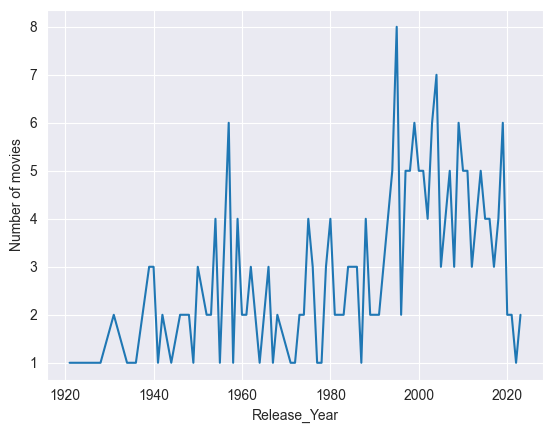

In [162]:
#Movies by year
movie_per_year = movies.groupby("Release_Year").size()
sns.lineplot(x=movie_per_year.index,y=movie_per_year.values)
plt.ylabel("Number of movies")

Newer movies fall in the leaderboard more often, probably related to the IMDb system. There are two peaks: 1995 and 2004.
Many more movies are being published nowadays and people tend to rate more recent movies, so there are less old movies in this leaderboard.

<Axes: xlabel='Release_Year', ylabel='Rating'>

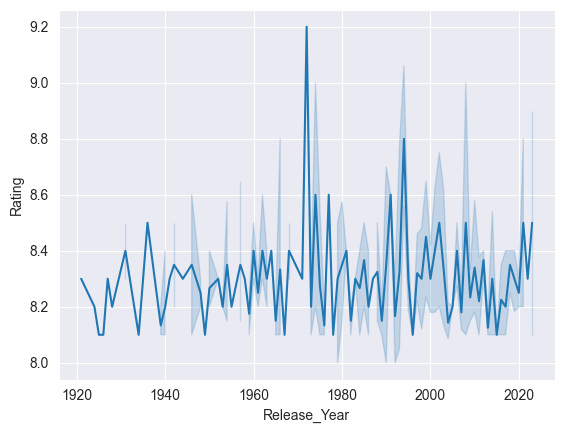

In [171]:
#Average movie duration by year
sns.lineplot(x="Release_Year",y="Rating",data=movies)

This shows that the average rating is constant throughout the years, despite newer movies taking most of the leaderboard.

In [163]:
print("Movies released in 1995 and 2004 are:")
movies[(movies["Release_Year"]==1995) | (movies["Release_Year"]==2004)]

Movies released in 1995 and 2004 are:


,Name,Release_Year,Duration,Certificate,Rating,Votes,Director,Stars,Description
Sl_No,,,,,,,,,
20,Seven,1995,127,18,8.6,1709898,David Fincher,"Morgan Freeman, Brad Pitt, Kevin Spacey","Two detectives, a rookie and a veteran, hunt a..."
43,The Usual Suspects,1995,106,18,8.5,1109438,Bryan Singer,"Kevin Spacey, Gabriel Byrne, Chazz Palminteri",The sole survivor of a pier shoot-out tells th...
75,Toy Story,1995,81,PG,8.3,1025430,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles",A cowboy doll is profoundly threatened and jea...
76,Braveheart,1995,178,15,8.3,1060101,Mel Gibson,"Mel Gibson, Sophie Marceau, Patrick McGoohan",Scottish warrior William Wallace leads his cou...
92,Eternal Sunshine of the Spotless Mind,2004,108,15,8.3,1036653,Michel Gondry,"Jim Carrey, Kate Winslet, Tom Wilkinson","When their relationship turns sour, a couple u..."
110,Heat,1995,170,15,8.3,682427,Michael Mann,"Al Pacino, Robert De Niro, Val Kilmer",A group of high-end professional thieves start...
125,Downfall,2004,156,15,8.2,363986,Oliver Hirschbiegel,"Bruno Ganz, Alexandra Maria Lara, Ulrich Matthes","Traudl Junge, the final secretary for Adolf Hi..."
138,Casino,1995,178,18,8.2,538586,Martin Scorsese,"Robert De Niro, Sharon Stone, Joe Pesci","In Las Vegas, two best friends - a mafia enfor..."
162,Howl's Moving Castle,2004,119,U,8.2,416386,Hayao Miyazaki,"Chieko Baishô, Takuya Kimura, Tatsuya Gashûin",When an unconfident young woman is cursed with...


In [164]:
#Top-rated movie directors
print("The most prolific directors are:")
movies.groupby("Director").size().sort_values(ascending=False)

The most prolific directors are:


Director
Christopher Nolan        7
Stanley Kubrick          7
Steven Spielberg         7
Martin Scorsese          7
Akira Kurosawa           6
                        ..
Irvin Kershner           1
Henri-Georges Clouzot    1
Harold Ramis             1
Gus Van Sant             1
Çagan Irmak              1
Length: 155, dtype: int64

Text(0, 0.5, 'Duration (min)')

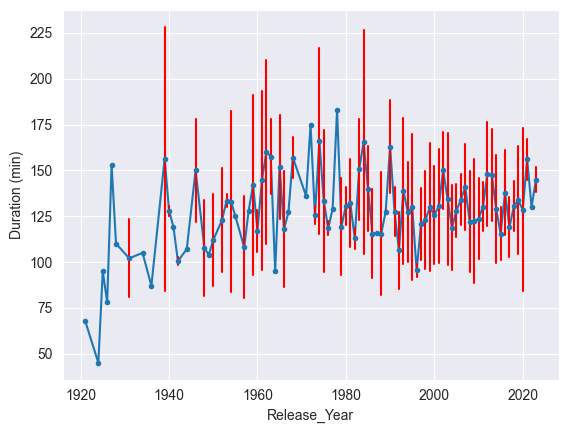

In [165]:
#Average movie duration by year
sns.lineplot(x="Release_Year",y="Duration",data=movies,errorbar="sd",err_style="bars",err_kws={"ecolor":"red","fmt":"."})
plt.ylabel("Duration (min)")

Despite some fluctuations, after 1960 the average movie duration was regular, around 130-160 minutes. Maybe the current trend of long movies (more than 3h) may not be the best strategy to get a high rating.

The most used words are:


(-0.5, 1919.5, 1507.5, -0.5)

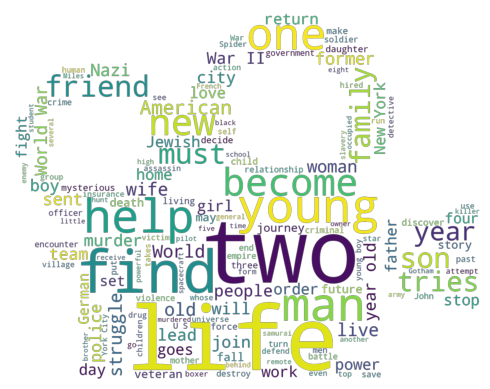

In [166]:
#Creating wordcloud for the description feature to see the most used words 
descriptions = movies["Description"].str.cat(sep=" ")
movie_picture = np.array(Image.open("movie_multimedia_film_2.png")) #Create an array from the image 
#Using the WordCloud package, create a clapperboard-shaped wordcloud with the most used words in descriptions
wordcloud = WordCloud(width=500, height=600, max_words=150, background_color=None, mask= movie_picture,mode="RGBA").generate(descriptions) #The mask parameter allows using the earlier created array to shape the word cloud
print("The most used words are:")
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")

In [167]:
#Split the "Stars" column in three different columns
top_rated_actors = movies["Stars"].str.split(', ', expand=True)
#Merge the columns in a single one
top_rated_actors = top_rated_actors.melt()

#Create a dataframe with the single actors and the numbers of appearances
number_of_app = top_rated_actors['value'].value_counts().reset_index()
number_of_app.columns = ['Actor', 'Number of Appearance'] #Rename the columns

count_df = number_of_app.drop_duplicates(subset='Actor', keep='first') #Remove the duplicates
print("The most popular actors are: De Niro, Harrison Ford, Tom Hanks and Di Caprio")
count_df.head(n=10)

The most popular actors are: De Niro, Harrison Ford, Tom Hanks and Di Caprio


,Actor,Number of Appearance
0,Robert De Niro,9
1,Harrison Ford,6
2,Tom Hanks,6
3,Leonardo DiCaprio,6
4,Christian Bale,5
5,Clint Eastwood,5
6,Charles Chaplin,5
7,Brad Pitt,4
8,Matt Damon,4
9,James Stewart,4


Text(0, 0.5, 'Number of movies')

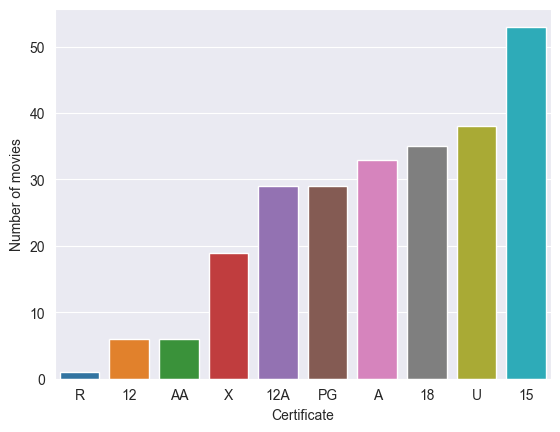

In [172]:
#Number of movies for each certification
movies_certifications = movies.groupby("Certificate").size().sort_values(ascending=True)
sns.barplot(x=movies_certifications.index,y=movies_certifications.values)
plt.ylabel("Number of movies")

There is not a distinct division between certificates. For example, 18 (adults) and U (Universal) have approximately the same number of movies. 

In [217]:
#Directors and their certificate
movies.groupby(["Director", "Certificate"]).size()

Director           Certificate
Aamir Khan         PG             1
Adam Elliot        12A            1
Akira Kurosawa     12             1
                   15             1
                   A              3
                                 ..
William Wyler      A              1
                   U              1
Wolfgang Petersen  AA             1
Yasujirô Ozu       U              1
Çagan Irmak        PG             1
Length: 194, dtype: int64